## Generating code using bia-bob
[BIA Bob](https://github.com/haesleinhuepf/bia-bob) is a Jupyter-magic based assistant for interacting with data via code generation. We can initialize it to use the ScaDS.AI LLM server like this:

In [1]:
import os
from bia_bob import bob

bob.initialize(endpoint="https://llm.scads.ai/v1",
               api_key=os.environ.get('SCADSAI_API_KEY'), 
               model="meta-llama/Llama-3.3-70B-Instruct")

#bob.initialize(endpoint="ollama",
#               api_key="none", 
#               model="gemma3:12b")

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will do it for you.

In [2]:
%bob Load the blobs.tif image file and show it.

Load the blobs.tif image file and display it using stackview.



[[ 40  32  24 ... 216 200 200]
 [ 56  40  24 ... 232 216 216]
 [ 64  48  24 ... 240 232 232]
 ...
 [ 72  80  80 ...  48  48  48]
 [ 80  80  80 ...  48  48  48]
 [ 96  88  80 ...  48  48  48]]
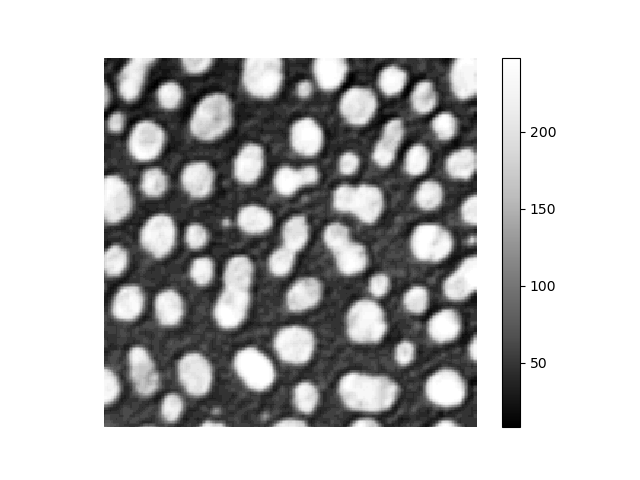
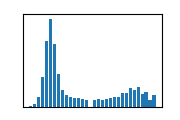

In [3]:
import stackview
from skimage.io import imread

image = imread("blobs.tif")
stackview.insight(image)

In [4]:
%%bob
Load the blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Visualize the result next to the original and 
also visualize an overlay of both images

Load the blobs.tif grayscale image, segment the nuclei-like objects using Otsu's method and connected component labeling, and visualize the results.



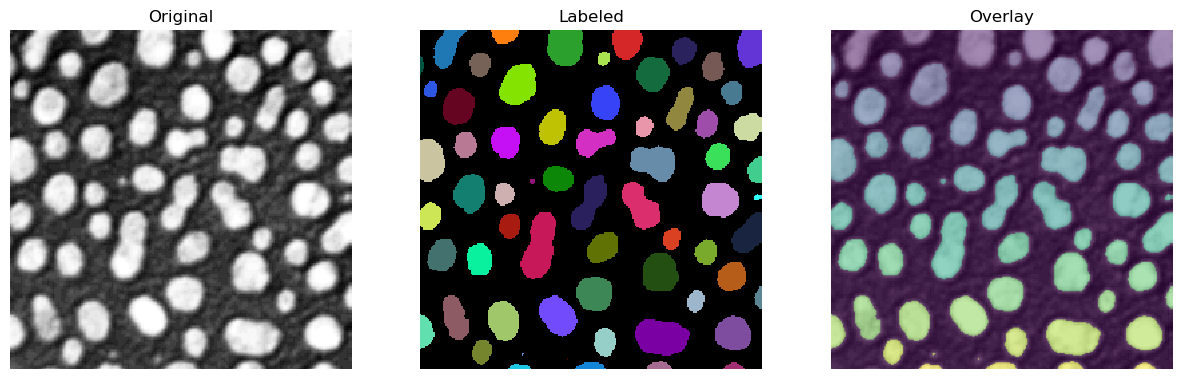

In [7]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.measure import label

thresh = threshold_otsu(image)
binary = image > thresh
labeled_image = label(label(binary))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
stackview.imshow(image, plot=ax[0])
ax[0].set_title('Original')
stackview.imshow(labeled_image, plot=ax[1])
ax[1].set_title('Labeled')
stackview.imshow(image, plot=ax[2])
ax[2].set_title('Overlay')
ax[2].imshow(labeled_image, cmap='viridis', alpha=0.5)
plt.show()

## Exercise
Ask bob to solve a task in another scientific domain.

In [8]:
%bob draw a plot of a ReLU Activation function. Keep it short.

Plot the ReLU activation function.

